### 高维数据向低维数据映射

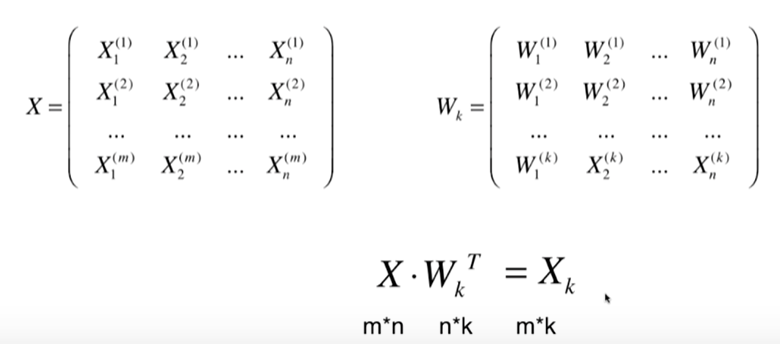
X表示本身的样本数据，即高维数据，为m * n的矩阵。  
W_k表示主成分矩阵，为k * n的矩阵，该矩阵含有k个主成分，每个主成分表示一个单位方向；每个主成分有n维，表示每个主成分表示的坐标轴有n个元素。  
每个样本和每个主成分做点乘，得到每个样本映射到每个主成分上的模的大小，将他们合并成一个向量，表示将该样本映射到每个主成分上的转换后样本。

### 低维数据恢复为高维数据

恢复后的矩阵已经不是原矩阵了。因为降维的过程已经丢失了一些信息。但是该操作在数学上是成立的。
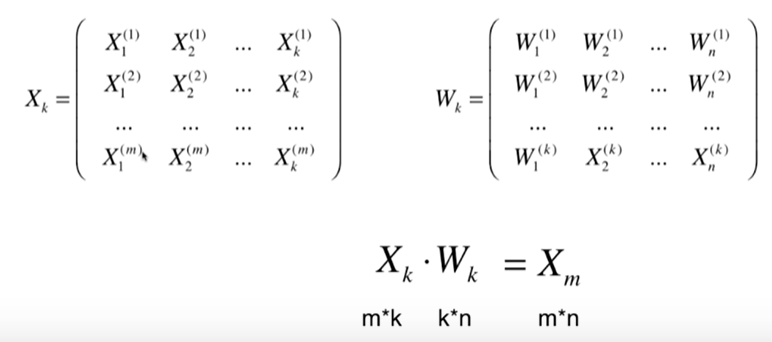
X_k表示低维数据。W_k表示主成分矩阵

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))  # 100个样本，每个样本2个特征
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size = 100)

In [3]:
from playML.PCA import PCA

pca = PCA(n_components = 2) # 2个主成分
pca.fit(X)

PCA(n_components=2)

In [4]:
pca.components_  # 第一主成分，和第二主成分

array([[ 0.74147941,  0.67097563],
       [ 0.67097813, -0.74147714]])

In [5]:
pca = PCA(n_components=1)  # 1个主成分
pca.fit(X)

PCA(n_components=1)

In [6]:
X_reduction = pca.transform(X) # 将原数据映射到主成分轴上

In [7]:
X_reduction.shape  # 降维了(100,2)->(100,1)

(100, 1)

In [8]:
# 将低维数据映射到高维
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

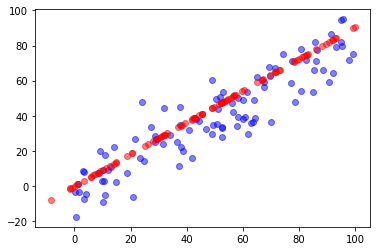

In [9]:
# 但是还原后的高维数据和原数据不同
# 有些信息在降维的过程中还是被消失了
plt.scatter(X[:, 0], X[:, 1], color = 'b', alpha=0.5)
plt.scatter(X_restore[:, 0], X_restore[:, 1], color = 'r', alpha=0.5)
plt.show()